In [1]:
# import the necessary tools 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import tree
from subprocess import call
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.model_selection import cross_val_score




In [2]:


#read and display the dataset
titanic = pd.read_csv('titanic.csv')
titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:


titanic.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:

#Looking at the titanic.info we can clearly see that the cabin column has less data (204) which means that it will be pointless to use it as it is going to produce minimum results. so we are going to drop it and use the others
titanic.drop("Cabin", axis= 1, inplace=True)



In [5]:

titanic.dropna(how='any', inplace = True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


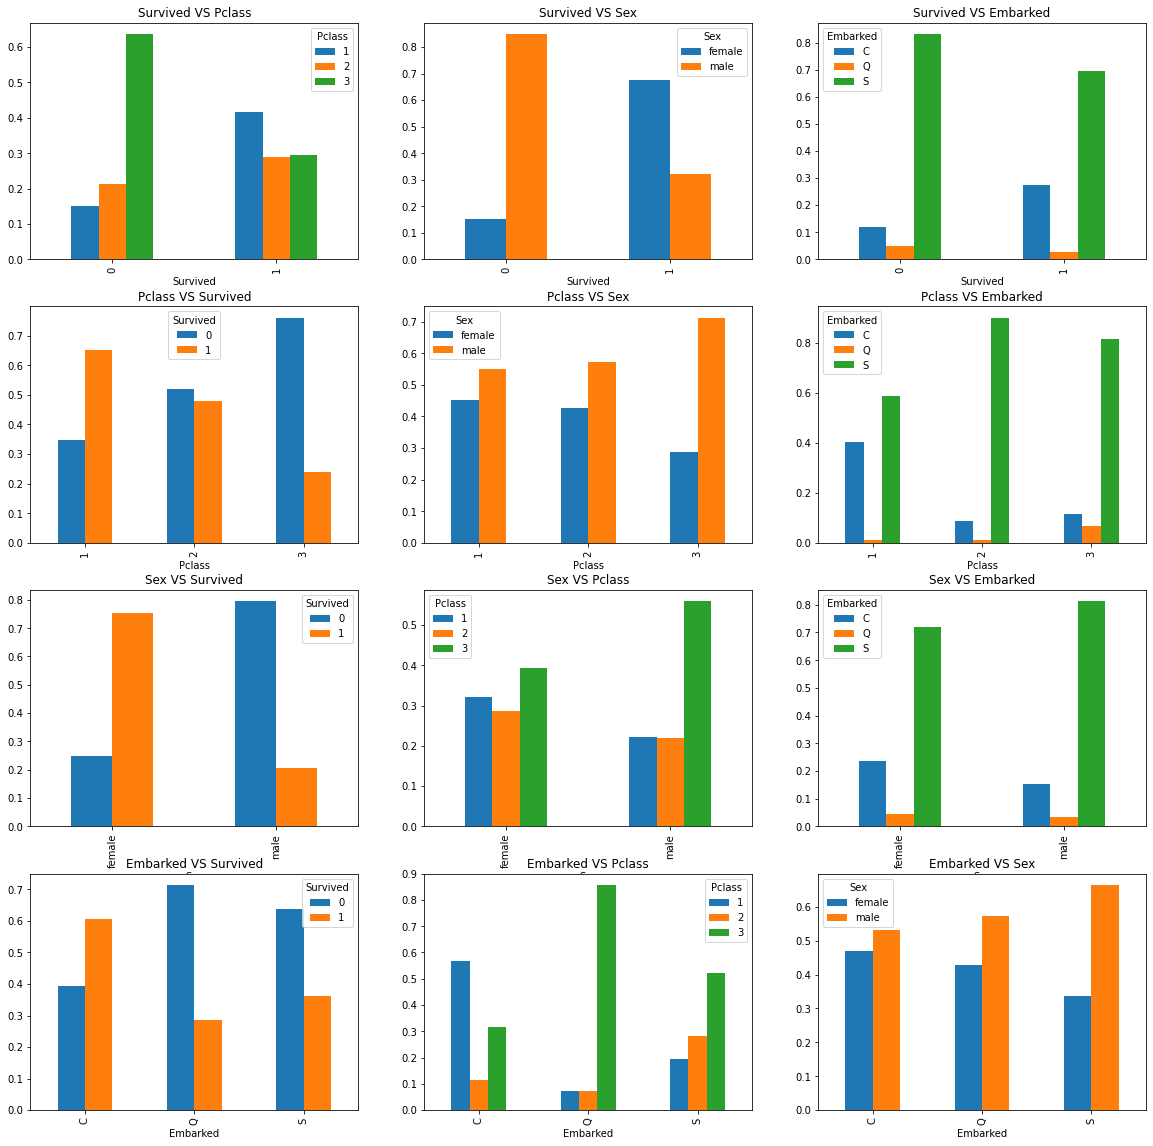

In [6]:
# select the columns (categical values) 
cols = ['Survived','Pclass', 'Sex', 'Embarked']
a = 0 #this var will serve as a graph location
plt.figure(figsize=(20,20))#set the canvas
for group in cols:#we interating through the categorical(that can help with group the data) values that can serve as y axis
    for i, e in zip(cols, range(1,len(cols)+1)):    #and the second loop will get us the location of the graph and the x axis value
        if group != i: #here we check if the group and i (which are values coming from the same list) we check if they are not the same
            
            
            #we use a variable that we created for graph location purpose and increment it to one before ploting
            a += 1
            
            #we set the ax so that each graph behave in terms of location
            ax = plt.subplot(4,3,a)
            
            #and below we use the first iterator (group) to group the and the second iterator to select a colon in that group the count and normalize the values
            # and then we unstack it to prevent the bars from stacking on top of each other (prevent)
            titanic.groupby(group)[i].value_counts(normalize=True).unstack().plot(kind='bar', ax=ax)
            plt.title(group+' VS '+i) #and finaly set the title using our iterators
            

In [7]:


#duplicate the dataset to avoid making changes to the original
new_titanic = titanic.copy()
new_titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
# convert Sex and Embarked to digits

for i in ['Sex', 'Embarked']:
    
    a = 0 
    
    print(i) 
    
    #get unique values in the the selected column => sort the value 
    #this is to avoid replacing randomly        
    for valu in new_titanic[i].sort_values().unique():   
            
        new_titanic.loc[new_titanic[i] == valu, i ] = a       # loc the rows tha have the selected value, then replace all those values by a variable
            
        print(valu,' = ',a)   #we display the results
        
        
        a +=1  # then we update the  variable a

Sex
female  =  0
male  =  1
Embarked
C  =  0
Q  =  1
S  =  2


In [9]:
#check our new df
new_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [10]:


new_titanic.isnull().sum()



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:

# we create a list of columns that we identify as independent variables 

independent = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

#get the x and y values y being our dependent var.
x = new_titanic.loc[:,independent].values
y = new_titanic.loc[:,'Survived'].values
print(y.shape, x.shape)



(712,) (712, 7)


In [12]:

#split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.40, random_state=1)



In [13]:
#split the test set into 2 set as well (for our dev set)
x_dev, x_test, y_dev, y_test = train_test_split(x_test,y_test, test_size= 0.50, random_state=1)

In [14]:


(x_dev.size/x.size), (x_test.size/x.size), (x_train.size/x.size)#check the split ratio.... not perfect but not too bad



(0.199438202247191, 0.20084269662921347, 0.5997191011235955)

In [15]:

#build the model and train the model
DecisionTreeClassifier(random_state = 1)
decision_model = DecisionTreeClassifier().fit(x_train, y_train)

array([[65, 19],
       [16, 42]], dtype=int64)

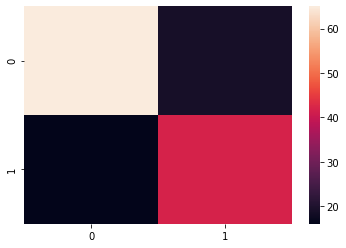

In [16]:


#predict or test our model on the dev set
predict1 = decision_model.predict(x_dev)
#compute the metric just  want to see what is patern
from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm = confusion_matrix(y_dev, predict1)
sns.heatmap(cm)#plot the matrix result
cm



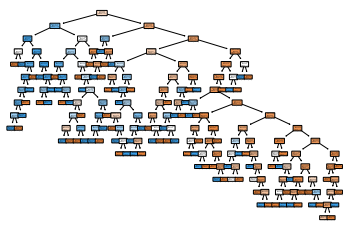

In [17]:

graphviz_installed = False

if (graphviz_installed):
  export_graphviz(decision_model, out_file='dot_data.dot', feature_names = independent,
                  rounded = True, proportion = False, precision = 2, filled = True)
  
  # Convert to png using system command
  call(['dot', '-Tpng', 'dot_data.dot', '-o', 'dot_data.png', '-Gdpi=600'])
  
else: 
  fig = plt.figure()
  tree.plot_tree(decision_model,feature_names = independent, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree
  fig.savefig('dot_data.png')
  




In [18]:


#compute the model's accuracy on the development set a

#prediction = decision_model.predict(x_dev)
decision1 = decision_model.score(x_dev, y_dev)
decision1




0.7535211267605634

In [19]:
#76 is not that bad but for our case model we cannot complain that much

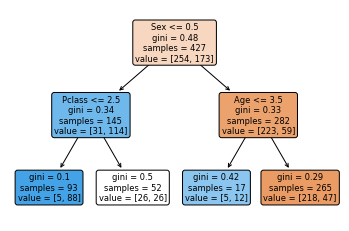

In [20]:
#create a model
DecisionTreeClassifier(random_state = 1)
#train the model tweak depth of the tree to 2
decision_model = DecisionTreeClassifier(max_depth=2).fit(x_train, y_train)

#test the model on the dev set
decision2 = decision_model.score(x_dev, y_dev)
#plot a pic of the decision patern
dot_data = StringIO()

graphviz_installed = False

if (graphviz_installed):
  export_graphviz(decision_model, out_file='dot_data.dot', feature_names = independent,
                  rounded = True, proportion = False, precision = 2, filled = True)
  
  # Convert to png using system command
  call(['dot', '-Tpng', 'dot_data.dot', '-o', 'dot_data.png', '-Gdpi=600'])
  
else: 
  fig = plt.figure()
  tree.plot_tree(decision_model,feature_names = independent, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree
  fig.savefig('dot_data.png')

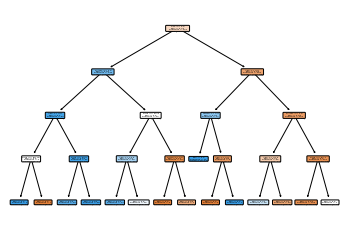

In [21]:
#create a model
DecisionTreeClassifier(random_state = 1)
#train the model tweak depth of the tree to 4
decision_model = DecisionTreeClassifier(max_depth=4).fit(x_train, y_train)

#test the model on the dev set
decision2 = decision_model.score(x_dev, y_dev)
#plot a pic of the decision patern
graphviz_installed = False

if (graphviz_installed):
  export_graphviz(decision_model, out_file='dot_data.dot', feature_names = independent,
                  rounded = True, proportion = False, precision = 2, filled = True)
  
  # Convert to png using system command
  call(['dot', '-Tpng', 'dot_data.dot', '-o', 'dot_data.png', '-Gdpi=600'])
  
else: 
  fig = plt.figure()
  tree.plot_tree(decision_model,feature_names = independent, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree
  fig.savefig('dot_data.png')

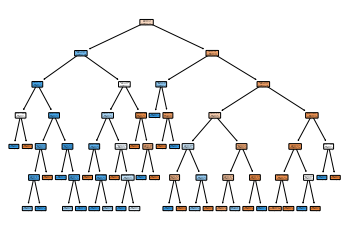

In [22]:
#create a model
DecisionTreeClassifier(random_state = 1)
#train the model tweak depth of the tree to 6
decision_model = DecisionTreeClassifier(max_depth=6).fit(x_train, y_train)

#test the model on the dev set
decision2 = decision_model.score(x_dev, y_dev)
#plot a pic of the decision patern

graphviz_installed = False

if (graphviz_installed):
  export_graphviz(decision_model, out_file='dot_data.dot', feature_names = independent,
                  rounded = True, proportion = False, precision = 2, filled = True)
  
  # Convert to png using system command
  call(['dot', '-Tpng', 'dot_data.dot', '-o', 'dot_data.png', '-Gdpi=600'])
  
else: 
  fig = plt.figure()
  tree.plot_tree(decision_model,feature_names = independent, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree
  fig.savefig('dot_data.png')

In [23]:
decision2

0.7535211267605634

In [24]:
DecisionTreeClassifier

sklearn.tree._classes.DecisionTreeClassifier

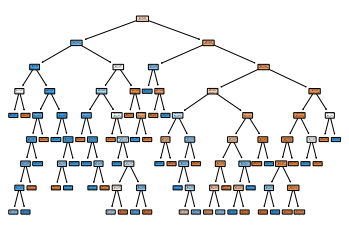

In [25]:
#create a model
DecisionTreeClassifier(random_state = 1)
#train the model tweak depth of the tree to 8
decision_model = DecisionTreeClassifier(max_depth=8).fit(x_train, y_train)

#test the model on the dev set
decision2 = decision_model.score(x_dev, y_dev)
#plot a pic of the decision patern
graphviz_installed = False

if (graphviz_installed):
  export_graphviz(decision_model, out_file='dot_data.dot', feature_names = independent,
                  rounded = True, proportion = False, precision = 2, filled = True)
  
  # Convert to png using system command
  call(['dot', '-Tpng', 'dot_data.dot', '-o', 'dot_data.png', '-Gdpi=600'])
  
else: 
  fig = plt.figure()
  tree.plot_tree(decision_model,feature_names = independent, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree
  fig.savefig('dot_data.png')

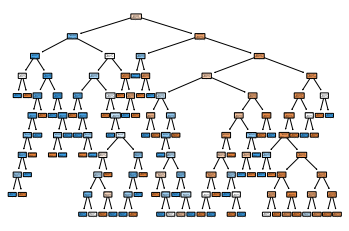

In [26]:


#create a model
DecisionTreeClassifier(random_state = 1)
#train the model tweak depth of the tree to 10
decision_model = DecisionTreeClassifier(max_depth=10).fit(x_train, y_train)

#test the model on the dev set
decision2 = decision_model.score(x_dev, y_dev)
#plot a pic of the decision patern
graphviz_installed = False

if (graphviz_installed):
  export_graphviz(decision_model, out_file='dot_data.dot', feature_names = independent,
                  rounded = True, proportion = False, precision = 2, filled = True)
  
  # Convert to png using system command
  call(['dot', '-Tpng', 'dot_data.dot', '-o', 'dot_data.png', '-Gdpi=600'])
  
else: 
  fig = plt.figure()
  tree.plot_tree(decision_model,feature_names = independent, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree
  fig.savefig('dot_data.png')



In [27]:
depth = [None, 2,4,6,8,10] #we create a list of the of our tree and from none to 10 
x_  =  [x_train, x_dev]    #group the trail and dev set x axis and y axis together
y_  =  [y_train, y_dev]

#these two list will save the result of our models for the training and the test on dev set
train_list = []
dev_list =[]

#setting labels for our scores
identifier =  ['Training Accuracies', 'Development Accuracies']

#now we loop trough the x's and y's and their id's
for x, y, i in zip(x_, y_,  identifier):
    
    print('\n',i,'\n') # we print the id as the title of our algorithm
    
    #now here is where all the maggic is happening 
    # for each depth
    for d in depth:
        
        
        #we create a model for it and  stabilized the randomness for consistent result
        DecisionTreeClassifier(random_state = 1)
        
        #train the model of each depth
        decision_model = DecisionTreeClassifier(max_depth=d).fit(x_train, y_train)
        
        #get the score and print it
        decision = decision_model.score(x, y)
        print('Depth:',d,'\n', 'Accuracy:', decision)
        
        # now we want also to save our model so we say if it training put the result in the training list else put it dev set
        #we need these result for  our plot
        if i == 'Training Accuracies':
            train_list.append(decision)
        else:
            dev_list.append(decision)



 Training Accuracies 

Depth: None 
 Accuracy: 0.9929742388758782
Depth: 2 
 Accuracy: 0.8056206088992974
Depth: 4 
 Accuracy: 0.8548009367681498
Depth: 6 
 Accuracy: 0.8992974238875878
Depth: 8 
 Accuracy: 0.9297423887587822
Depth: 10 
 Accuracy: 0.955503512880562

 Development Accuracies 

Depth: None 
 Accuracy: 0.7746478873239436
Depth: 2 
 Accuracy: 0.7816901408450704
Depth: 4 
 Accuracy: 0.7605633802816901
Depth: 6 
 Accuracy: 0.7535211267605634
Depth: 8 
 Accuracy: 0.795774647887324
Depth: 10 
 Accuracy: 0.7535211267605634


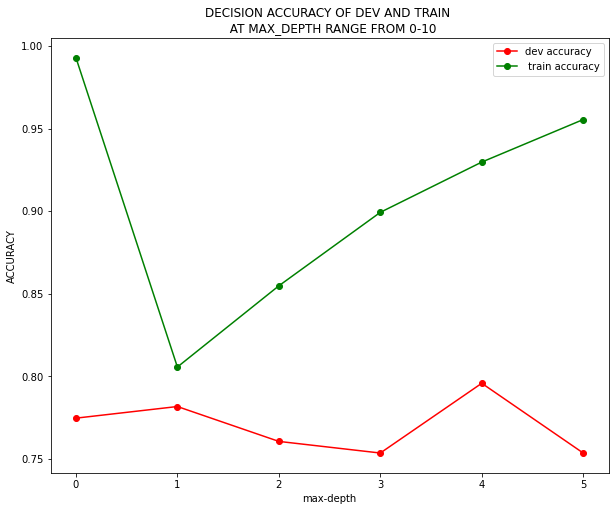

In [28]:


#let's now get a visual represent of our model and see which one we going to buy
plt.figure(figsize=(10,8))# as usual we set the canvas

#plot the the resulting lists

plt.plot(range(len(dev_list)),dev_list,color = 'r',marker = 'o', label='dev accuracy')
plt.plot(range(len(train_list)),train_list,color = 'g',marker = 'o',  label = ' train accuracy')

plt.title('DECISION ACCURACY OF DEV AND TRAIN \n  AT MAX_DEPTH RANGE FROM 0-10')
plt.xlabel('max-depth')
plt.ylabel('ACCURACY')
plt.legend()



In [29]:
###Meaning of the training line

#The model was performing well at 0 (max-depth) nearly maxing at 1.00 
#at depth_max of 2 the model drops 
#as the depth_max increases we see the model also increasing in accuracy

###Development line
#the development line shows best accuracy at max_depth of 4
# this can imply that max_depth 4 is the best one. 

In [30]:

#creating our final tree
DecisionTreeClassifier(random_state = 1)
 
#train it
decision_model = DecisionTreeClassifier(max_depth=8).fit(x_train, y_train)

#calculate the score 
decision = decision_model.score(x_test, y_test)
decision


0.8391608391608392

In [31]:
#We can see from our accuracy score that our model didn't do that bad. It actually performed well.

In [32]:
####   TASK 7 Starts Here ###


In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
#build our BaggingClassifier model
model = BaggingClassifier( n_estimators=100, random_state=7)

#train it ((easy straightforward))
model.fit(x_train,y_train)

# prediction on test set
y_pred_ = model.predict(x_dev)
bagging_score = metrics.accuracy_score(y_dev, y_pred_)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_dev, y_pred_))

Accuracy: 0.7746478873239436


In [34]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a random Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_dev)

In [35]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_dev, y_pred))



Accuracy: 0.7676056338028169


In [36]:

#build our models (vanilla flavours)

ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = xgb.XGBClassifier()
#boost_array = [ada_boost, grad_boost, xgb_boost]
eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')

#create their string representators
labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']


#calculate each model cross validation  on the training set
for clf, label in zip([ada_boost, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Mean: 0.801, std: (+/-) 0.044 [Ada Boost]
Mean: 0.829, std: (+/-) 0.045 [Grad Boost]
Mean: 0.831, std: (+/-) 0.056 [XG Boost]
Mean: 0.834, std: (+/-) 0.058 [Ensemble]


In [37]:
####Grad_Boost
#we cam see that the gradient boost classifier performs well. so we are going to try and alter its parameter and see if we can get better results from it on the development set

In [38]:
#recreate the model and set a deeper depth adn N-estimators at least to 150
grad_boost = GradientBoostingClassifier(n_estimators=150, max_depth=10)

#train the model
clf = grad_boost.fit(x_train, y_train)

#do the prediction
grad_predict = grad_boost.predict(x_dev)
#calculate the accuracy
grad_boost_score = metrics.accuracy_score(y_dev, grad_predict)
#print the result
print("Accuracy:",metrics.accuracy_score(y_dev, grad_predict))

Accuracy: 0.7746478873239436


In [39]:
####Model selection
#Bagging and Grad_boost perform well compared to other models on development set.
#we will display the score and pick one

In [40]:
#we start by display the score of our two finalist models (score on the dev set)
print('bagging score:', bagging_score, '\n Grad_boost score:', grad_boost_score)



bagging score: 0.7746478873239436 
 Grad_boost score: 0.7746478873239436


In [41]:
#make final prediction  ofr gradient booster
grad_predict_ = grad_boost.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, grad_predict_))

Accuracy: 0.8181818181818182


In [42]:

#make final prediction on the bagging model
y_bagge_predict = model.predict(x_test)
metrics.accuracy_score(y_test, y_bagge_predict)


0.8041958041958042

In [43]:
###as we can see from the scores they are exactly the same, and as such we have to pick any of the two.